# Data prep/export/viz 

In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data2020 = pd.read_csv(
    os.path.join(
        "data", "waqi-covid19-airqualitydata-2020.csv"), 
        skiprows = 4, parse_dates=["Date"]
    )

data2020 = data2020[data2020.Country == "US"].set_index("Date")

data2019 = pd.read_csv(
    os.path.join(
        "data", "waqi-covid19-airqualitydata-2019Q1.csv"), 
        skiprows = 4, parse_dates=["Date"])

data2019 = data2019.append(
    pd.read_csv(
        os.path.join("data", 
            "waqi-covid19-airqualitydata-2019Q2.csv"
        ),  skiprows = 4, parse_dates=["Date"])
    )

data2019 = data2019[data2019.Country == "US"].set_index("Date")

covidData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

# when did the county/city pass 100 cumulative cases? 

citiesWithAQI = set(data2020.City.unique())
citiesWithCaseNums = set(covidData.county.unique())
cities = citiesWithAQI.intersection(citiesWithCaseNums)

cities.add("New York City")
cities.add("District of Columbia")

remainingCities = cities.copy()
startDates = {}

for city in cities:
    
    cityData = covidData[covidData.county == city]
    row = np.searchsorted(cityData.cases, 25)
    try:
        startDates[city] = cityData.iloc[row, 0]
    except IndexError as e:
        print("Bad data for " + city)
        remainingCities.remove(city)

nyc = {'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'The Bronx'}

Bad data for Raleigh


Look into startDates:

In [10]:
startDates

{'Houston': '2020-05-22',
 'Sacramento': '2020-03-14',
 'Jackson': '2020-05-11',
 'Madison': '2020-04-18',
 'Hartford': '2020-03-20',
 'El Paso': '2020-03-24',
 'Oakland': '2020-03-19',
 'Philadelphia': '2020-03-19',
 'Dallas': '2020-05-23',
 'Richmond': '2020-03-31',
 'Austin': '2020-05-29',
 'New York City': '2020-03-10',
 'Miami': '2020-04-05',
 'Charlotte': '2020-05-24',
 'Denver': '2020-03-15',
 'Fresno': '2020-03-26',
 'Los Angeles': '2020-03-11',
 'District of Columbia': '2020-03-17',
 'Columbus': '2020-04-11',
 'Columbia': '2020-04-06',
 'Milwaukee': '2020-03-18',
 'Baltimore': '2020-03-22',
 'Providence': '2020-03-25',
 'San Diego': '2020-03-15',
 'Salem': '2020-04-03',
 'San Francisco': '2020-03-13',
 'Honolulu': '2020-03-20'}

'no2'
   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0             11.2              30.0              1.0   
1                 1             13.0              25.0              1.0   
2                 2              9.3              38.0              1.0   
3                 3             12.1              46.0              1.9   
4                 4             10.2              34.0              3.8   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0               9.0             0.089286               0.300000  
1               9.0             0.076923               0.360000  
2               9.0             0.107527               0.236842  
3               5.0             0.157025               0.108696  
4               9.0             0.372549               0.264706  


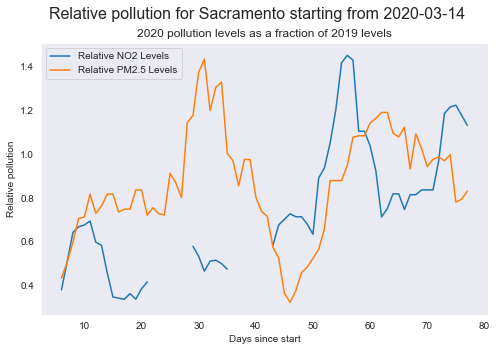

'no2'
'no2'
   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0              7.4              28.0              6.9   
1                 1              1.9               5.0              1.0   
2                 2              1.0              10.0              1.4   
3                 3              4.2              18.0              2.8   
4                 4              1.9              18.0              1.0   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              49.0             0.932432               1.750000  
1              14.0             0.526316               2.800000  
2              25.0             1.400000               2.500000  
3              23.0             0.666667               1.277778  
4               8.0             0.526316               0.444444  


<Figure size 432x288 with 0 Axes>

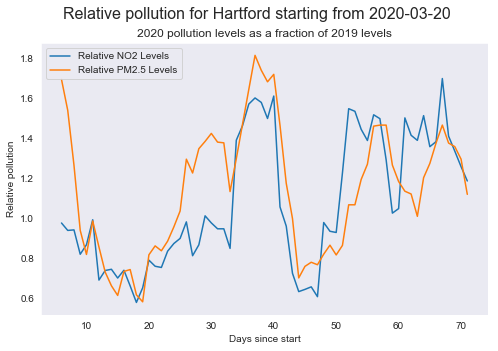

   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0              5.6              26.0              3.8   
1                 1              3.8              44.0              6.5   
2                 2              5.6              42.0              1.9   
3                 3              3.8              30.0              1.9   
4                 4              1.9              30.0              1.9   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              16.0             0.678571               0.615385  
1              17.0             1.710526               0.386364  
2              17.0             0.339286               0.404762  
3              43.0             0.500000               1.433333  
4              21.0             1.000000               0.700000  


<Figure size 432x288 with 0 Axes>

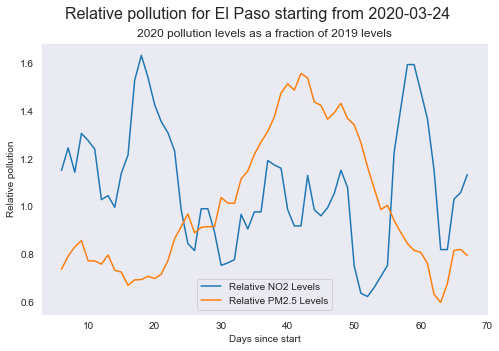

   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0              5.6              21.0             10.2   
1                 1             10.2              25.0             11.2   
2                 2              9.3              21.0              9.3   
3                 3              6.5              25.0              8.4   
4                 4             10.2              30.0              5.6   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              21.0             1.821429               1.000000  
1              25.0             1.098039               1.000000  
2              21.0             1.000000               1.000000  
3              21.0             1.292308               0.840000  
4              25.0             0.549020               0.833333  


<Figure size 432x288 with 0 Axes>

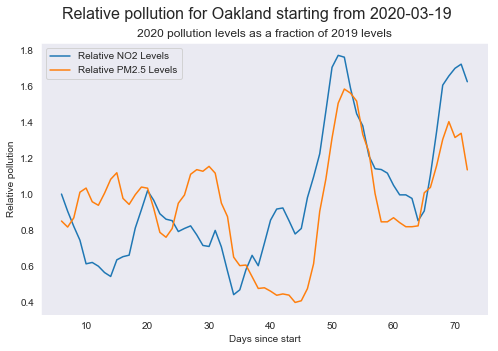

   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0              6.5              39.0             13.0   
1                 1              6.5              25.0              7.5   
2                 2              2.8              20.0              1.9   
3                 3              2.8              14.0              2.8   
4                 4              8.4              21.0              6.5   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              33.0             2.000000               0.846154  
1              46.0             1.153846               1.840000  
2              29.0             0.678571               1.450000  
3              28.0             1.000000               2.000000  
4              20.0             0.773810               0.952381  


<Figure size 432x288 with 0 Axes>

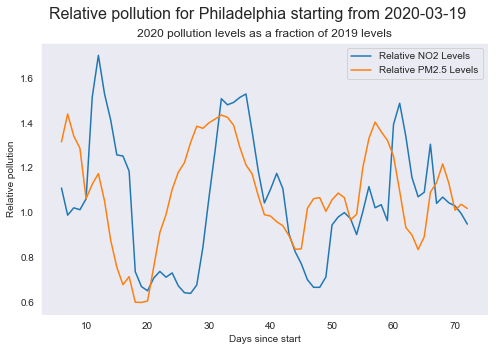

'no2'
   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 5              3.2              25.0              1.9   
1                 6              2.4              23.0              1.3   
2                 7              2.6              23.0              2.1   
3                 8              2.5              14.0              1.9   
4                 9              2.4               NaN              1.0   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              23.0             0.593750               0.920000  
1              23.0             0.541667               1.000000  
2              34.0             0.807692               1.478261  
3              23.0             0.760000               1.642857  
4              21.0             0.416667                    NaN  


<Figure size 432x288 with 0 Axes>

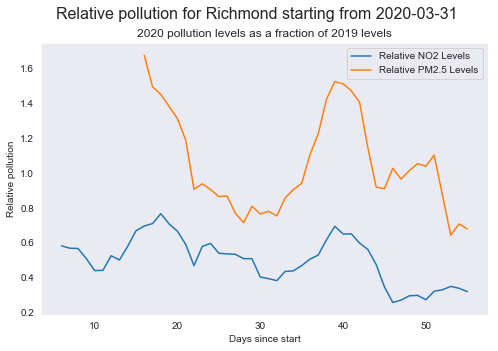

'no2'
   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0            11.48              23.2            16.76   
1                 1            11.62              23.4            17.70   
2                 2            26.50              29.2            19.24   
3                 3            21.78              26.6            10.22   
4                 4            16.54              37.0             6.64   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              41.0             1.459930               1.767241  
1              23.4             1.523236               1.000000  
2              33.4             0.726038               1.143836  
3              21.8             0.469238               0.819549  
4              17.2             0.401451               0.464865  


<Figure size 432x288 with 0 Axes>

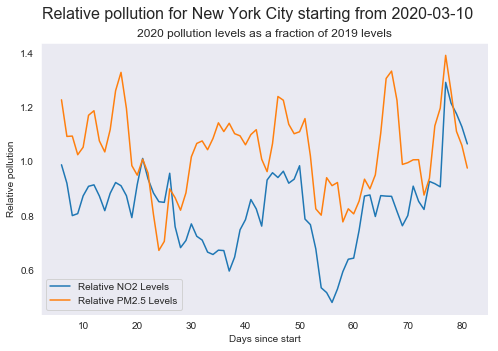

'no2'
'no2'
   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0              7.4              25.0              4.2   
1                 1              6.9              30.0              6.9   
2                 2              9.2              42.0              5.1   
3                 3              5.5              30.0              9.2   
4                 4             10.6              25.0              3.2   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              53.0             0.567568               2.120000  
1              34.0             1.000000               1.133333  
2              42.0             0.554348               1.000000  
3              38.0             1.672727               1.266667  
4              13.0             0.301887               0.520000  


<Figure size 432x288 with 0 Axes>

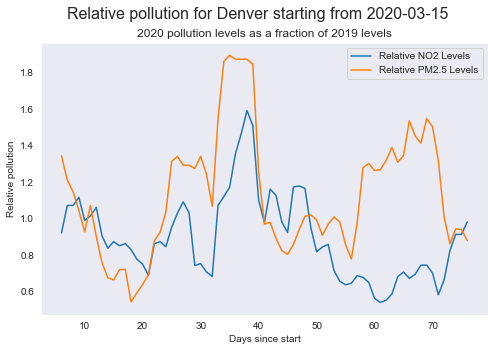

   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0              4.7              25.0              4.7   
1                 1              3.8              15.0              5.6   
2                 2              3.8              20.0              3.8   
3                 3              5.6              27.0              2.8   
4                 4              6.5              44.0              6.5   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              16.0             1.000000               0.640000  
1              25.0             1.473684               1.666667  
2              32.0             1.000000               1.600000  
3              20.0             0.500000               0.740741  
4              27.0             1.000000               0.613636  


<Figure size 432x288 with 0 Axes>

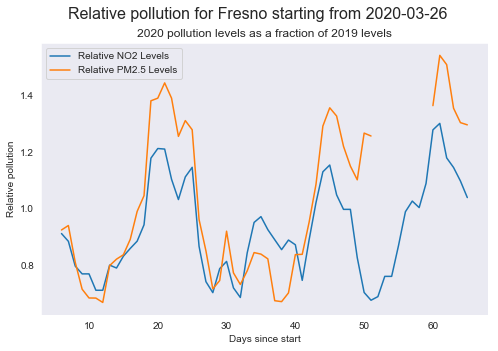

   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0             15.8              38.0              8.4   
1                 1             16.7              42.0             26.9   
2                 2             30.6              33.0             16.7   
3                 3             31.5              31.0             11.2   
4                 4             31.5              42.0              6.5   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              20.0             0.531646               0.526316  
1              29.0             1.610778               0.690476  
2              30.0             0.545752               0.909091  
3              18.0             0.355556               0.580645  
4              23.0             0.206349               0.547619  


<Figure size 432x288 with 0 Axes>

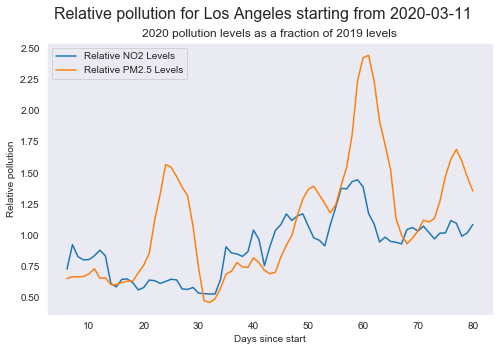

'median_2020'
   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0              6.5              27.0             10.2   
1                 1              6.5              25.0              5.6   
2                 2              2.8              25.0              2.8   
3                 3              2.8              19.0              3.8   
4                 4             11.2              30.0              6.5   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              42.0             1.569231               1.555556  
1              26.0             0.861538               1.040000  
2              15.0             1.000000               0.600000  
3              17.0             1.357143               0.894737  
4              34.0             0.580357               1.133333  


<Figure size 432x288 with 0 Axes>

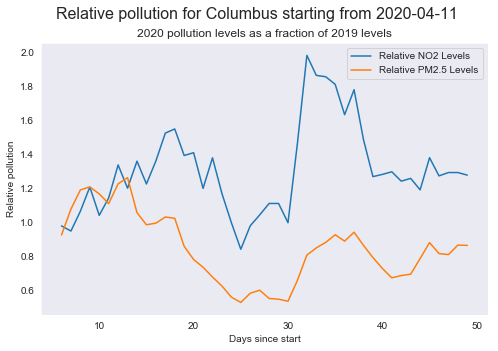

'no2'
   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0             20.1              42.0              6.5   
1                 1             17.5              59.0              6.4   
2                 2             11.2              42.0              6.5   
3                 3             12.1              21.0              3.8   
4                 4             22.3              42.0              2.8   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              52.0             0.323383               1.238095  
1              38.0             0.365714               0.644068  
2              16.0             0.580357               0.380952  
3              15.0             0.314050               0.714286  
4              38.0             0.125561               0.904762  


<Figure size 432x288 with 0 Axes>

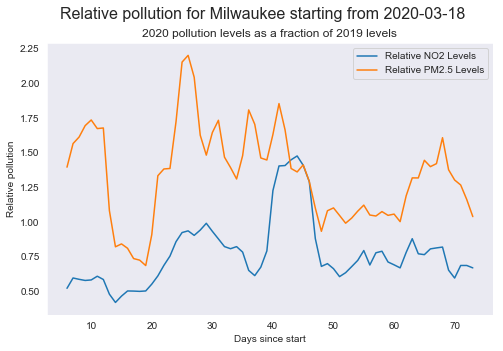

   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0              2.8               9.0              2.8   
1                 1             13.9              18.0              6.5   
2                 2              9.3              36.0              8.4   
3                 3              6.5              10.0              8.4   
4                 4              8.4              17.0             11.2   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              21.0             1.000000               2.333333  
1              15.0             0.467626               0.833333  
2              21.0             0.903226               0.583333  
3              25.0             1.292308               2.500000  
4              37.0             1.333333               2.176471  


<Figure size 432x288 with 0 Axes>

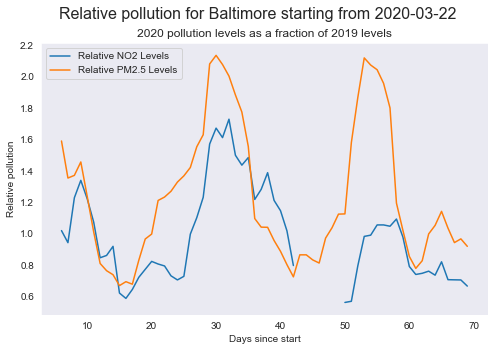

   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0             12.1              13.0              5.6   
1                 1             12.1              17.0             11.2   
2                 2             16.7              21.0             13.0   
3                 3             16.7              34.0             11.2   
4                 4             13.9              50.0              4.7   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              21.0             0.462810               1.615385  
1              21.0             0.925620               1.235294  
2              21.0             0.778443               1.000000  
3              21.0             0.670659               0.617647  
4              13.0             0.338129               0.260000  


<Figure size 432x288 with 0 Axes>

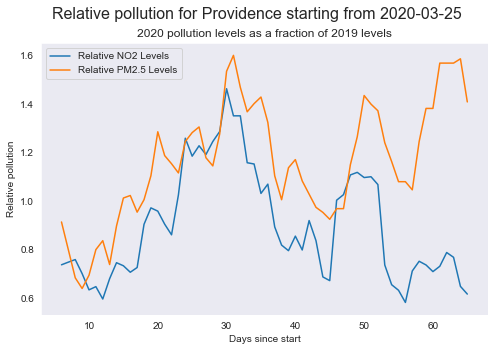

'median_2020'
'no2'
   Days since start  median_2019_no2  median_2019_pm25  median_2020_no2  \
0                 0              8.4              17.0              2.8   
1                 1              8.4              21.0              2.8   
2                 2              7.5              25.0              2.8   
3                 3              8.4              30.0              5.6   
4                 4              8.4              42.0              5.6   

   median_2020_pm25  Relative NO2 Levels  Relative PM2.5 Levels  
0              53.0             0.333333               3.117647  
1              17.0             0.333333               0.809524  
2              13.0             0.373333               0.520000  
3               9.0             0.666667               0.300000  
4              17.0             0.666667               0.404762  


<Figure size 432x288 with 0 Axes>

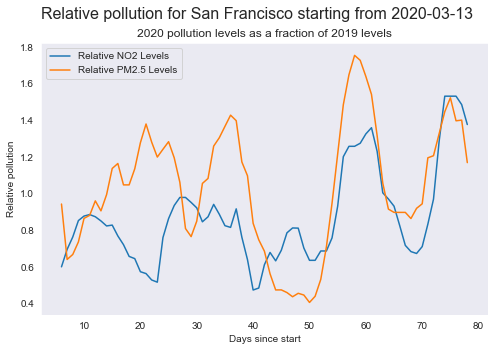

'no2'


<Figure size 432x288 with 0 Axes>

In [9]:

sns.set_style("dark")

for city, start in startDates.items():

    if city=="New York City":
        cityMask2020 = data2020.apply(lambda row: row.City in nyc, axis = 1) 
        cityMask2019 = data2019.apply(lambda row: row.City in nyc, axis = 1) 
    else:
        cityMask2020 = (data2020.City == city)
        cityMask2019 = (data2019.City == city)

    cityMask2020 = cityMask2020 & ((data2020["Specie"] == "no2") | (data2020["Specie"] == "pm25"))
    cityMask2019 = cityMask2019 & ((data2019["Specie"] == "no2") | (data2019["Specie"] == "pm25"))

    data2020subset = data2020.loc[(data2020.index >= start) &
        cityMask2020, ["Specie", "median"]]
    data2020subset['Days since start'] = pd.Series(data2020subset.index - 
        pd.to_datetime(start)).dt.days.values
    data2020subset = data2020subset.set_index(
        ["Days since start", "Specie"])
     
    data2019subset = data2019.loc[(data2019.index >= pd.to_datetime(start) - pd.Timedelta(1, unit='y')) & 
        cityMask2019, ["Specie", "median"]]
    data2019subset["Days since start"] = pd.Series(data2019subset.index -
        (pd.to_datetime(start) - pd.Timedelta(1, unit='y'))).dt.days.values
    data2019subset = data2019subset.set_index(
        ["Days since start", "Specie"])
    
    # del data2020subset["Date"]
    # del data2019subset["Date"]
    

    if city=="New York City":
        data2020subset = data2020subset.groupby(["Days since start", "Specie"]).mean()
        data2019subset = data2019subset.groupby(["Days since start", "Specie"]).mean()


    try:
        data2020subset = data2020subset.unstack()
        data2019subset = data2019subset.unstack()

        combinedData = data2019subset.merge(
        data2020subset, suffixes=("_2019", "_2020"), on = "Days since start")

        combinedData["Relative NO2 Levels"] = combinedData["median_2020"]["no2"] / combinedData["median_2019"]["no2"]
        combinedData["Relative PM2.5 Levels"] = combinedData["median_2020"]["pm25"] / combinedData["median_2019"]["pm25"]
        
        outputData = combinedData.reset_index()
        outputData.columns = ['_'.join(col).strip('_') 
            for col in outputData.columns.values]
        
        print(outputData.head())
#         outputData.to_csv(os.path.join("output", 
#             f"{city}_from_{start}.csv"), index=False)
        

        fig, ax = plt.subplots(figsize=(8, 5))

        ax.plot(combinedData[["Relative NO2 Levels", 
            "Relative PM2.5 Levels"]].rolling(7).mean().reset_index(level=0, drop=True))
        
        ax.legend(["Relative NO2 Levels", 
            "Relative PM2.5 Levels"], loc = 'best')
        ax.set_xlabel("Days since start")
        ax.set_ylabel("Relative pollution")
        fig.suptitle("Relative pollution for" + 
            f" {city} starting from {start}", fontsize=16)
        ax.set_title("2020 pollution levels as a fraction of 2019 levels")
        plt.show()
#         plt.savefig(os.path.join("output", "Relative pollution for" + 
#             f" {city} starting from {start}"))
        plt.clf()
    except KeyError as e:
        print(e)